# Importing Necessary Package

In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import linear_model

import numpy as np 
from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
import re
from sklearn.pipeline import Pipeline
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.svm import SVR
from sklearn import metrics

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

# Importing Datasets

In [31]:
train_df=pd.read_csv("train.csv")
test_df=pd.read_csv("test.csv")

# View Top Five Data for Training Data

In [32]:
train_df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Details Summary for Training Dataset

In [33]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Check Null Valu -- Details

In [34]:
train_df.isnull().sum().sort_values(ascending = False)

Cabin          687
Age            177
Embarked         2
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

# Testing Data Details

In [35]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


# Fill Up Null value 

In [36]:
train_df["Age"].fillna(train_df.Age.mean(),inplace=True)
train_df["Cabin"].fillna(0,inplace=True)
# Fill Up Null value 
test_df["Age"].fillna(train_df.Age.mean(),inplace=True)
test_df["Cabin"].fillna(0,inplace=True)
#droping the 2 missing values of embarked
train_df.dropna(inplace=True)


# Check Training Data 

In [37]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S


# Check Again Null Value in Test Data

In [38]:
train_df.isnull().sum().sort_values(ascending=False)


Embarked       0
Cabin          0
Fare           0
Ticket         0
Parch          0
SibSp          0
Age            0
Sex            0
Name           0
Pclass         0
Survived       0
PassengerId    0
dtype: int64

# Replacing multiple values at the same time


In [39]:
train_df['Sex'].replace(['female','male'],['0','1']).head()


0    1
1    0
2    0
3    0
4    1
Name: Sex, dtype: object

# Training Dataset convert string to number  to number (Modifi Data Formate)

In [130]:

X = train_df.drop(["PassengerId","Name","Ticket","Cabin","Fare","Survived"],axis=1)
Y = train_df["Survived"]

df_test=test_df.drop(["PassengerId","Name","Cabin","Ticket","Fare"],axis=1)



# This function change Embarked column speciall letter to number
def emb(t):
    if t=="S":
        return 2
    elif t=="C":
        return 1
    else:
        return 0

    
X['Sex'] = X.Sex.replace(['female','male'],[0,1])
X['Embarked'] = X.Embarked.apply(emb)


# For Tesing DataSet
df_test['Sex'] = df_test.Sex.replace(['female','male'],[0,1])
df_test['Embarked'] = df_test.Embarked.apply(emb)





# Data Visualization for deeply understanding data flow and dependancy

# Function For Display Feature Bar Chart

In [131]:
def bar_chart(feature):
    survived = train_df[train_df['Survived']==1][feature].value_counts()
    dead = train_df[train_df['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

# Surived and Dead Based On Sex
Female People Survived More

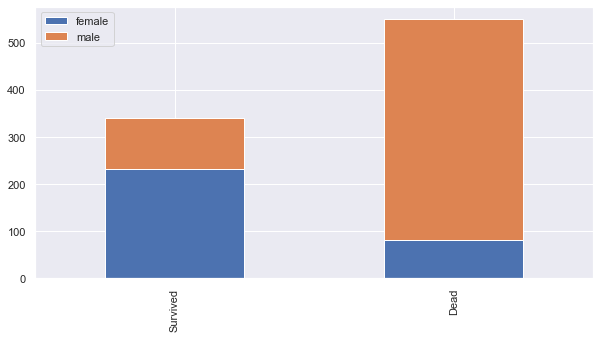

In [132]:
bar_chart('Sex')

# Surived and Dead Based Seat Class
First Class Survived More

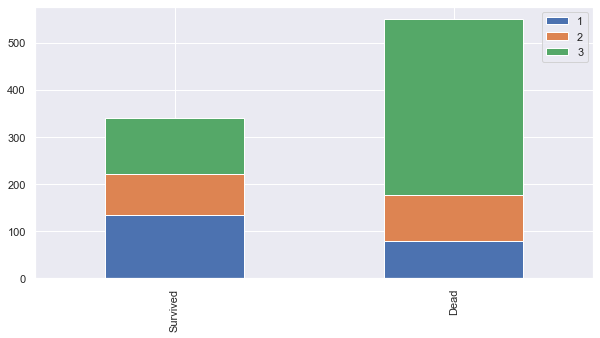

In [133]:
bar_chart('Pclass')

# Surived and Dead Based Single or Family together

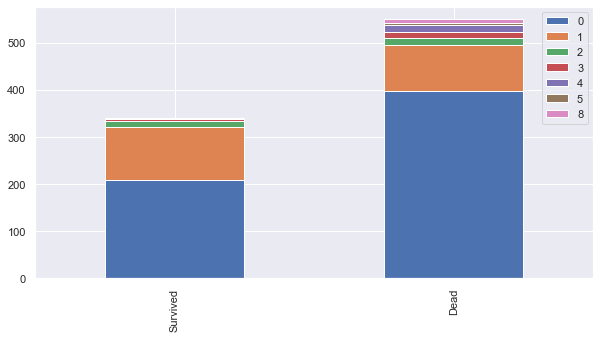

In [134]:
bar_chart('SibSp')

# Surived and Dead Based Single or Family together
Servied More Those who visited Titanic With Family

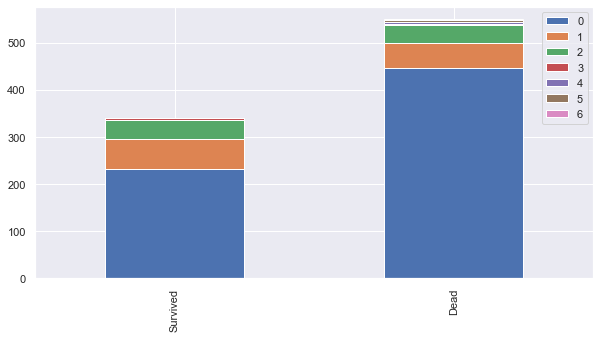

In [135]:
bar_chart('Parch')


# Surived and Dead Based Where Passengers start theire journy to Titanic
Servied More Those who start theire journy from Cherbourg they survived more

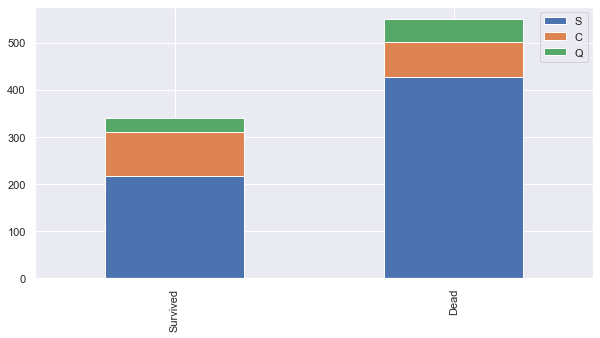

In [136]:
bar_chart('Embarked')

In [137]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S


# Divide Training Data For Training and Test

In [138]:

X_train, X_test, Y_train, Y_test = train_test_split(X, Y)


# RandomForestClassifier

In [139]:
my_model_rforest = RandomForestClassifier(n_estimators=60)
my_model_rforest.fit(X_train,Y_train)
y_pred = my_model_rforest.predict(X_test)
acc_gaus = round(my_model_rforest.score(X_train,Y_train)*100,2)
print("Accuracy = ",acc_gaus)


Accuracy =  94.29


# Naive Bayes

In [140]:

model = GaussianNB()

# Train the model using the training sets 
model.fit(X_train, Y_train)

#Predict Output 
predicted= model.predict(X_test)
acc_gaus = round(model.score(X_train,Y_train)*100,2)
print("Accuracy = ",acc_gaus)

Accuracy =  79.58


# Logistic Regression

In [141]:
model = linear_model.LogisticRegression(random_state = 42,max_iter= 150)

# Train the model using the training sets 
model.fit(X_train, Y_train)

#Predict Output 
predicted= model.predict(X_test)
acc_gaus = round(model.score(X_train,Y_train)*100,2)
print("Accuracy = ",acc_gaus)

Accuracy =  80.63


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# Deep Learning Sequential 

In [142]:
embed_dim = 128
lstm_out = 196

model = Sequential()
model.add(Embedding(666, embed_dim,input_length = X.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(20,activation='softmax'))
model.compile(loss = 'sparse_categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 6, 128)            85248     
_________________________________________________________________
spatial_dropout1d_3 (Spatial (None, 6, 128)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 196)               254800    
_________________________________________________________________
dense_3 (Dense)              (None, 20)                3940      
Total params: 343,988
Trainable params: 343,988
Non-trainable params: 0
_________________________________________________________________
None


In [143]:
batch_size = 32
model.fit(X_train, Y_train, epochs = 32, batch_size=batch_size, verbose = 2)

C:\ProgramData\Anaconda3\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Epoch 1/32
 - 1s - loss: 2.0570 - accuracy: 0.5886
Epoch 2/32
 - 0s - loss: 0.6757 - accuracy: 0.5856
Epoch 3/32
 - 0s - loss: 0.6656 - accuracy: 0.6201
Epoch 4/32
 - 0s - loss: 0.6688 - accuracy: 0.6306
Epoch 5/32
 - 0s - loss: 0.6696 - accuracy: 0.5991
Epoch 6/32
 - 0s - loss: 0.6614 - accuracy: 0.6231
Epoch 7/32
 - 0s - loss: 0.6281 - accuracy: 0.6577
Epoch 8/32
 - 0s - loss: 0.5632 - accuracy: 0.7312
Epoch 9/32
 - 0s - loss: 0.5033 - accuracy: 0.7943
Epoch 10/32
 - 0s - loss: 0.4897 - accuracy: 0.7928
Epoch 11/32
 - 0s - loss: 0.4970 - accuracy: 0.7898
Epoch 12/32
 - 0s - loss: 0.4683 - accuracy: 0.8093
Epoch 13/32
 - 0s - loss: 0.4671 - accuracy: 0.8078
Epoch 14/32
 - 0s - loss: 0.4501 - accuracy: 0.8033
Epoch 15/32
 - 0s - loss: 0.4339 - accuracy: 0.8228
Epoch 16/32
 - 0s - loss: 0.4224 - accuracy: 0.8108
Epoch 17/32
 - 0s - loss: 0.4456 - accuracy: 0.8153
Epoch 18/32
 - 0s - loss: 0.4561 - accuracy: 0.8153
Epoch 19/32
 - 0s - loss: 0.4570 - accuracy: 0.8063
Epoch 20/32
 - 0s - l

# Support Vactor 

In [144]:
model =LinearSVC(multi_class='ovr',C=1.0,loss='squared_hinge', dual=False)


# Train the model using the training sets 
model.fit(X_train, Y_train)

#Predict Output 
predicted= model.predict(X_test)
acc_gaus = round(model.score(X_train,Y_train)*100,2)
print("Accuracy = ",acc_gaus)

Accuracy =  80.48


# DecisionTreeClassifier 

In [145]:
model =DecisionTreeClassifier()


# Train the model using the training sets 
model.fit(X_train, Y_train)

#Predict Output 
predicted= model.predict(X_test)
acc_gaus = round(model.score(X_train,Y_train)*100,2)
print("Accuracy = ",acc_gaus)

Accuracy =  94.29


In [146]:
df_test.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked
0,3,1,34.5,0,0,0
1,3,0,47.0,1,0,2
2,2,1,62.0,0,0,0
3,3,1,27.0,0,0,2
4,3,0,22.0,1,1,2


In [147]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,0,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,0,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,0,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,0,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,0,S


# Upload Data In Kaggle

# I used DecisionTreeClassifier as a  proposed algorithm

In [154]:
clf = DecisionTreeClassifier()
clf.fit(X_train, Y_train)

prediction = clf.predict(df_test)

In [155]:
df_test.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked
0,3,1,34.5,0,0,0
1,3,0,47.0,1,0,2
2,2,1,62.0,0,0,0
3,3,1,27.0,0,0,2
4,3,0,22.0,1,1,2


In [156]:
# prediction.shape
df_test.shape

(418, 6)

# Save Data In CSV File For Upload

In [157]:
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": prediction
    })

submission.to_csv('submission.csv', index=False)

# Read Submission CSV File

In [159]:
submission = pd.read_csv('submission.csv')
submission[0:100]

,PassengerId,Survived
0,892,0
1,893,0
2,894,1
3,895,1
4,896,1
...,...,...
95,987,0
96,988,1
97,989,0
98,990,0
